In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('C:/data/ames-housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Check for Missing Values
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

,Null Values,% Missing Values
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,872,59.726027
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


In [4]:
X = df[['GrLivArea', 'TotRmsAbvGrd']]
scaler= StandardScaler()
X = scaler.fit_transform(X)

In [5]:
# Initialize PCA model (you can specify the number of components)
pca = PCA(n_components=2)

# Fit the model to the data
pca.fit(X)

# Transform the data to the new principal components
pca_transformed_data = pca.transform(X)

combined_data = np.concatenate((X, pca_transformed_data), axis=1)

# Explained variance ratio (to see how much variance each component explains)
explained_variance = pca.explained_variance_ratio_

# Display the explained variance of each component
print("Explained Variance Ratio:")
print(explained_variance)

Explained Variance Ratio:
[0.91274469 0.08725531]


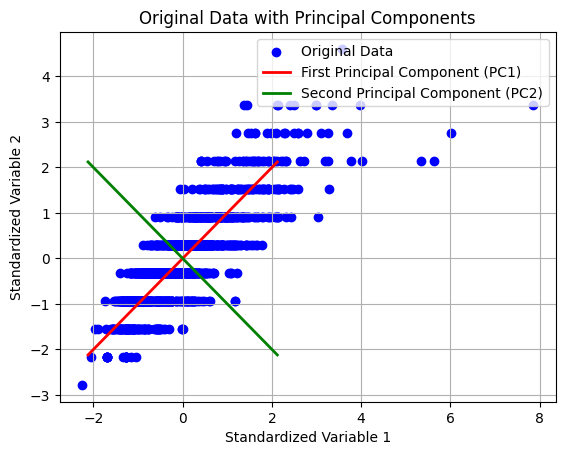

In [27]:
# Plot the original data
plt.scatter(X[:, 0], X[:, 1], label="Original Data", color='blue')

# Plot the first principal component as a line (PC1)
pc1 = pca.components_[0]  # First principal component
pc1_line = np.dot(np.linspace(-3, 3, 100).reshape(-1, 1), pc1.reshape(1, -1))
plt.plot(pc1_line[:, 0], pc1_line[:, 1], color='red', label='First Principal Component (PC1)', lw=2)

# Plot the second principal component as a line (PC2)
pc2 = pca.components_[1]  # Second principal component
pc2_line = np.dot(np.linspace(-3, 3, 100).reshape(-1, 1), pc2.reshape(1, -1))
plt.plot(pc2_line[:, 0], pc2_line[:, 1], color='green', label='Second Principal Component (PC2)', lw=2)

# Label the plot
plt.title('Original Data with Principal Components')
plt.xlabel('Standardized Variable 1')
plt.ylabel('Standardized Variable 2')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [7]:
# Initialize the Factor Analysis model (acts like PCA with correlated components)
fa = FactorAnalyzer(n_factors=1, rotation='oblimin')  # Oblimin allows for correlated components

# Fit the model to the data
fa.fit(X)

# Get the component loadings (the weights of each variable on the components)
loadings = fa.loadings_

factor_scores = fa.transform(X)
reconstructed_data = np.dot(factor_scores, loadings.T)
approximation_errors = X - reconstructed_data

# Display the factor loadings (similar to PCA loadings)
print("Factor Loadings:")
print(loadings)

Factor Loadings:
[[0.90856446]
 [0.90856446]]
